In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_full = pd.read_csv('../HousePrices/Data/train.csv')
test_full = pd.read_csv('../HousePrices/Data/test.csv')

print(train_full.shape)
print(test_full.shape)

(1460, 81)
(1459, 80)


In [3]:
train_full.drop("Id", axis = 1, inplace = True)
test_full.drop("Id", axis = 1, inplace = True)

In [4]:
train_full.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [5]:
train_qual = train_full.select_dtypes(include=['object']).columns
print(train_qual)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [6]:
pd.Categorical(train_full)

[MSSubClass, MSZoning, LotFrontage, LotArea, Street, ..., MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Length: 80
Categories (80, object): [1stFlrSF, 2ndFlrSF, 3SsnPorch, Alley, ..., WoodDeckSF, YearBuilt, YearRemodAdd, YrSold]

In [7]:
train_full_modified = train_full[['SalePrice', 'GrLivArea', 'BsmtQual']]
train_full_modified

,SalePrice,GrLivArea,BsmtQual
0,208500,1710,Gd
1,181500,1262,Gd
2,223500,1786,Gd
3,140000,1717,TA
4,250000,2198,Gd
...,...,...,...
1455,175000,1647,Gd
1456,210000,2073,Gd
1457,266500,2340,TA
1458,142125,1078,TA


In [8]:
train_full_modified=pd.get_dummies(train_full_modified, dtype='int64')

In [9]:
train_full_modified

,SalePrice,GrLivArea,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
0,208500,1710,0,0,1,0
1,181500,1262,0,0,1,0
2,223500,1786,0,0,1,0
3,140000,1717,0,0,0,1
4,250000,2198,0,0,1,0
...,...,...,...,...,...,...
1455,175000,1647,0,0,1,0
1456,210000,2073,0,0,1,0
1457,266500,2340,0,0,0,1
1458,142125,1078,0,0,0,1


In [10]:
train_full_modified.fillna(0)

,SalePrice,GrLivArea,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
0,208500,1710,0,0,1,0
1,181500,1262,0,0,1,0
2,223500,1786,0,0,1,0
3,140000,1717,0,0,0,1
4,250000,2198,0,0,1,0
...,...,...,...,...,...,...
1455,175000,1647,0,0,1,0
1456,210000,2073,0,0,1,0
1457,266500,2340,0,0,0,1
1458,142125,1078,0,0,0,1


In [11]:
from sklearn.model_selection import train_test_split

train, val= train_test_split(train_full_modified, test_size=0.3)

target_column = 'SalePrice'
Y_train = train[target_column].values
X_train = train.drop(target_column, axis=1).values
X_val = val.drop(target_column, axis=1).values
Y_val = val[target_column].values

In [12]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(1022, 5)
(1022,)
(438, 5)
(438,)


In [13]:
Y_train_reshaped = np.reshape(Y_train, (Y_train.shape[0], 1))
Y_val_reshaped = np.reshape(Y_val, (Y_val.shape[0], 1))

print(Y_train_reshaped.shape)
print(Y_val_reshaped.shape)

(1022, 1)
(438, 1)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [15]:
Y_train = np.log1p(Y_train)
Y_val = np.log1p(Y_val)

In [16]:
scaler2 = StandardScaler()
scaler2.fit(Y_train_reshaped)

Y_train_scaled = scaler2.transform(Y_train_reshaped)
Y_val_scaled = scaler2.transform(Y_val_reshaped)

In [17]:
train.isna().sum()

SalePrice      0
GrLivArea      0
BsmtQual_Ex    0
BsmtQual_Fa    0
BsmtQual_Gd    0
BsmtQual_TA    0
dtype: int64

In [18]:
val.isna().sum()

SalePrice      0
GrLivArea      0
BsmtQual_Ex    0
BsmtQual_Fa    0
BsmtQual_Gd    0
BsmtQual_TA    0
dtype: int64

In [19]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [20]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model.add(Input(shape=X_train.shape[1]))
model.add(Dense(32))
model.add(Dense(1))
loss = 'mse'
LEARNING_RATE = 0.01
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))
BATCH_SIZE = X_train_scaled.shape[0]
EPOCHS = 1000
history = model.fit(X_train_scaled, Y_train_scaled, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1022 samples
Epoch 1/1000
1022/1022 [==============================] - 1s 581us/sample - loss: 0.8839
Epoch 2/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.7571
Epoch 3/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.6597
Epoch 4/1000
1022/1022 [==============================] - 0s 4us/sample - loss: 0.5844
Epoch 5/1000
1022/1022 [==============================] - 0s 5us/sample - loss: 0.5260
Epoch 6/1000
1022/1022 [==============================] - 0s 4us/sample - loss: 0.4803
Epoch 7/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.4444
Epoch 8/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.4162
Epoch 9/1000
1022/1022 [==============================] - 0s 4us/sample - loss: 0.3938
Epoch 10/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3761
Epoch 11/1000
1022/1022 [==============================] - 0s 4us/sample - loss: 0.3619
Epoch 12/1000
102

Epoch 94/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3028
Epoch 95/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3028
Epoch 96/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3027
Epoch 97/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3027
Epoch 98/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3027
Epoch 99/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3027
Epoch 100/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3027
Epoch 101/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3027
Epoch 102/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3027
Epoch 103/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3027
Epoch 104/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3027
Epoch 105/1000
1022/1022 [=

Epoch 187/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3025
Epoch 188/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3025
Epoch 189/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3025
Epoch 190/1000
1022/1022 [==============================] - 0s 4us/sample - loss: 0.3025
Epoch 191/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3025
Epoch 192/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3025
Epoch 193/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3025
Epoch 194/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3025
Epoch 195/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3025
Epoch 196/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3025
Epoch 197/1000
1022/1022 [==============================] - 0s 4us/sample - loss: 0.3025
Epoch 198/1000
1022/1

1022/1022 [==============================] - 0s 3us/sample - loss: 0.3024
Epoch 280/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3024
Epoch 281/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3024
Epoch 282/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3024
Epoch 283/1000
1022/1022 [==============================] - 0s 4us/sample - loss: 0.3024
Epoch 284/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3024
Epoch 285/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3024
Epoch 286/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3024
Epoch 287/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3024
Epoch 288/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3024
Epoch 289/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3024
Epoch 290/1000
1022/1022 [==========

Epoch 372/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3023
Epoch 373/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3023
Epoch 374/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3023
Epoch 375/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3023
Epoch 376/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3023
Epoch 377/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3023
Epoch 378/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3023
Epoch 379/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3023
Epoch 380/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3023
Epoch 381/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3023
Epoch 382/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3023
Epoch 383/1000
1022/1

Epoch 465/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3023
Epoch 466/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3023
Epoch 467/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3023
Epoch 468/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3023
Epoch 469/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3023
Epoch 470/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3023
Epoch 471/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3023
Epoch 472/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3023
Epoch 473/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3023
Epoch 474/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3023
Epoch 475/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3023
Epoch 476/1000
1022/1

Epoch 558/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 559/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 560/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 561/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 562/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 563/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 564/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 565/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 566/1000
1022/1022 [==============================] - 0s 4us/sample - loss: 0.3022
Epoch 567/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 568/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 569/1000
1022/1

Epoch 651/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 652/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 653/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 654/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 655/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 656/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 657/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 658/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 659/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 660/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 661/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 662/1000
1022/1

Epoch 744/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 745/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 746/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 747/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 748/1000
1022/1022 [==============================] - 0s 4us/sample - loss: 0.3022
Epoch 749/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 750/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 751/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 752/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 753/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 754/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 755/1000
1022/1

Epoch 837/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 838/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 839/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 840/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 841/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 842/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 843/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 844/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 845/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 846/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 847/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 848/1000
1022/1

Epoch 930/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 931/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 932/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 933/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 934/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 935/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 936/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 937/1000
1022/1022 [==============================] - 0s 2us/sample - loss: 0.3022
Epoch 938/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 939/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 940/1000
1022/1022 [==============================] - 0s 3us/sample - loss: 0.3022
Epoch 941/1000
1022/1

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


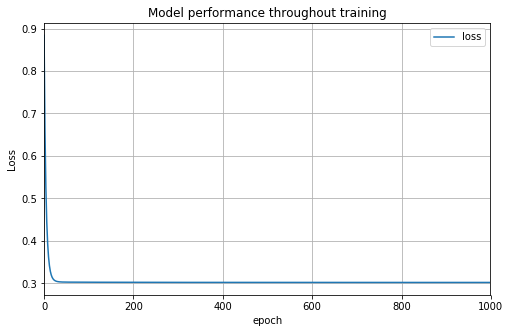

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [22]:
predict = model.predict(X_val_scaled)

In [29]:
predict

array([[-8.92811298e-01],
       [ 2.85957313e+00],
       [ 2.94161472e-03],
       [ 1.18971968e+00],
       [ 1.71006584e+00],
       [-1.55243501e-01],
       [ 4.57761645e-01],
       [-6.08376980e-01],
       [ 5.50232530e-01],
       [ 5.30616403e-01],
       [-4.75967884e-01],
       [-3.58270764e-01],
       [-5.31873882e-01],
       [-7.61383057e-01],
       [-1.32939529e+00],
       [-2.34413922e-01],
       [-8.26637074e-02],
       [-7.04496145e-01],
       [-2.14797795e-01],
       [ 7.71895409e-01],
       [ 4.19785202e-01],
       [ 3.90360922e-01],
       [ 6.24774158e-01],
       [-6.65263832e-01],
       [ 3.33722639e+00],
       [-4.53929231e-02],
       [-5.89741707e-01],
       [-2.45477796e-01],
       [ 8.10070857e-02],
       [-9.93958831e-01],
       [-9.77160811e-01],
       [ 3.22685182e-01],
       [-2.20911384e-01],
       [-7.12342620e-01],
       [-2.33708188e-01],
       [ 2.40297183e-01],
       [-4.75921273e-01],
       [ 3.97226602e-01],
       [ 1.7

In [23]:
from sklearn.metrics import mean_squared_error

mse_krm=mean_squared_error(Y_val_scaled, predict)
print(mse_krm)

0.32601526357960886


### Xgboost

In [58]:
import pandas_profiling as pp

pp.ProfileReport(train_full)

Number of variables,80
Number of observations,1460
Total Missing (%),6.0%
Total size in memory,912.6 KiB
Average record size in memory,640.1 B
Numeric,37
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [57]:
limitNA = 0.8* train_full.shape[0]
print(limitNA)
train_full.dropna(axis=1, thresh=limitNA)

1168.0


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [46]:
from xgboost import XGBRegressor

model2 = XGBRegressor()



In [47]:
model2.fit(X_train_scaled, Y_train_scaled)

[13:41:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [48]:
predictions = model2.predict(X_val_scaled)

In [49]:
mse_krm2 = mean_squared_error(Y_val_scaled, predictions)
print(mse_krm2)

0.3004676648235922


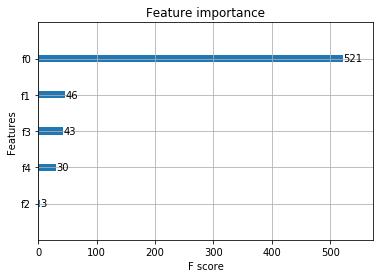

In [53]:
from xgboost import plot_importance
plot_importance(model2, max_num_features=5)
plt.show()